Atmosphere Tests on am code ouput
====

This notebook is to test the issues with Tatm externally to the calculator in order to first determine whether the issue is still there in the original output rather than introduced during the read in process and second to make it easier to test changes to the am set-up.

First we need to run am on a configuration file to produce the desired output. We do this using a modified version of the ACT_annual files in the cookbook. Here we will use the one for 25% water column. The am output is then created using the command: 
am ACT_annual_25.amc 10 GHz 2000 GHz 10 MHz 90 deg 1.0 > ACT_10_2000_GHz_10MHz_el90_annual_25.txt

Set the following to be the location of the output.

In [1]:
amfilesdir = '/home/mark/research/am_code/test/'

# Import necessary modules
import numpy as np
import matplotlib.pyplot as pl
from astropy import units as u

First we run this using the same set-up used by the code. 

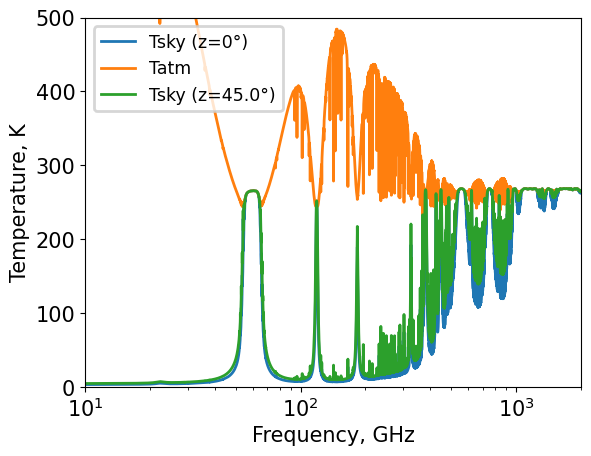

In [2]:
filename = amfilesdir + 'ACT_10_2000_GHz_10MHz_el90_annual_25_inc_Tcmb.txt'

fileimp=np.genfromtxt(filename)

freqs = fileimp[:,0]
tskyz0 = fileimp[:,2]
tau0 = fileimp[:,1]
tatm = tskyz0/(1-np.exp(-tau0))
elevation = 45*u.deg
zenith = 90*u.deg-elevation
tau = tau0/np.cos(zenith)
transmittance = np.exp(-tau)
tskyznon0 = tatm * (1-transmittance)

pl.figure()
pl.plot(freqs, tskyz0,label='Tsky (z=0°)')
pl.plot(freqs, tatm, label='Tatm')
pl.plot(freqs, tskyznon0,label='Tsky (z='+str(zenith.value)+'°)')
pl.xscale('log')
pl.xlim(10,2000)
pl.ylim(0, 500)
pl.xlabel('Frequency, GHz')
pl.ylabel('Temperature, K')
pl.legend(prop={'size':'small'},numpoints=1)


Scott Paine has pointed out that am includes Tcmb by default. If we remove this from ACT_annual_25.amc and re-run, we see a strong reduction in Tatm at low frequencies.

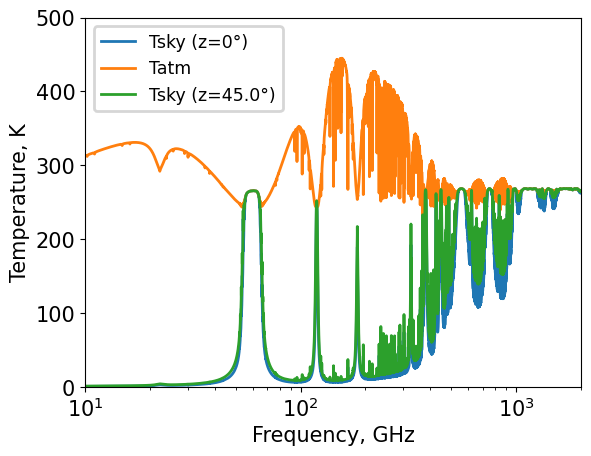

In [3]:
filename = amfilesdir + 'ACT_10_2000_GHz_10MHz_el90_annual_25.txt'

fileimp=np.genfromtxt(filename)

freqs = fileimp[:,0]
tskyz0 = fileimp[:,2]
tau0 = fileimp[:,1]
tatm = tskyz0/(1-np.exp(-tau0))
elevation = 45*u.deg
zenith = 90*u.deg-elevation
tau = tau0/np.cos(zenith)
transmittance = np.exp(-tau)
tskyznon0 = tatm * (1-transmittance)

pl.figure()
pl.plot(freqs, tskyz0,label='Tsky (z=0°)')
pl.plot(freqs, tatm, label='Tatm')
pl.plot(freqs, tskyznon0,label='Tsky (z='+str(zenith.value)+'°)')
pl.xscale('log')
pl.xlim(10,2000)
pl.ylim(0, 500)
pl.xlabel('Frequency, GHz')
pl.ylabel('Temperature, K')
pl.legend(prop={'size':'small'},numpoints=1)


And if we want to fix Tatm to a constant.

268.5971


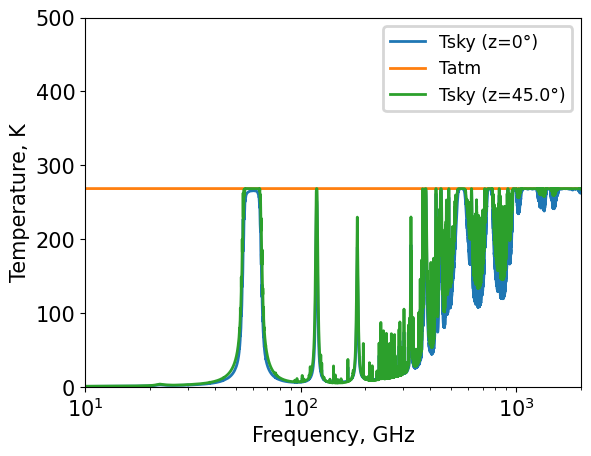

In [9]:
tatmconst=np.max(tskyz0)
print(tatmconst)
pl.figure()
pl.plot(freqs, tskyz0,label='Tsky (z=0°)')
pl.plot(freqs, np.full_like(tskyz0,tatmconst), label='Tatm')
pl.plot(freqs, tatmconst* (1-transmittance),label='Tsky (z='+str(zenith.value)+'°)')
pl.xscale('log')
pl.xlim(10,2000)
pl.ylim(0, 500)
pl.xlabel('Frequency, GHz')
pl.ylabel('Temperature, K')
pl.legend(prop={'size':'small'},numpoints=1)


With am, it's possible to output a file at a given zenith angle to avoid using the equations from the ALMA memo.

am ACT_annual_25.amc 10 GHz 2000 GHz 10 MHz 45 deg 1.0 > ACT_10_2000_GHz_10MHz_el45_annual_25.txt

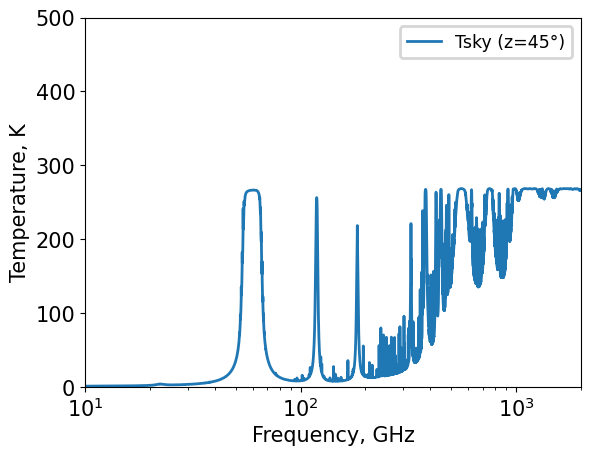

In [5]:
filename = amfilesdir + 'ACT_10_2000_GHz_10MHz_el45_annual_25.txt'

fileimp=np.genfromtxt(filename)

freqs = fileimp[:,0]
tskyz45 = fileimp[:,2]
tau45 = fileimp[:,1]

pl.figure()
pl.plot(freqs, tskyz45,label='Tsky (z=45°)')
#pl.plot(freqs, tatm, label='Tatm')
#pl.plot(freqs, tskyznon0,label='Tsky (z='+str(zenith.value)+'°)')
pl.xscale('log')
pl.xlim(10,2000)
pl.ylim(0, 500)
pl.xlabel('Frequency, GHz')
pl.ylabel('Temperature, K')
pl.legend(prop={'size':'small'},numpoints=1)


Now to see the difference between this and the Tsky (z=45°) created by the previous methods.

Text(0, 0.5, 'Tsky difference, K')

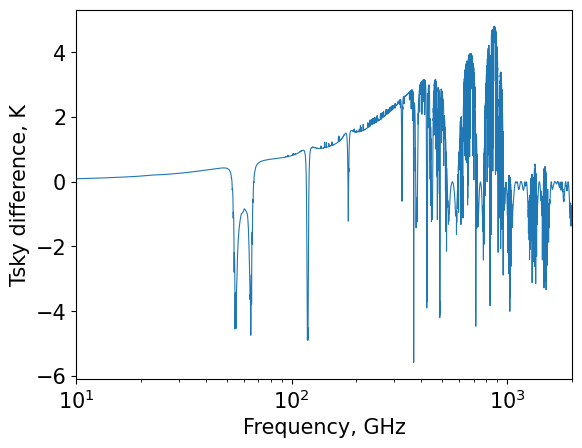

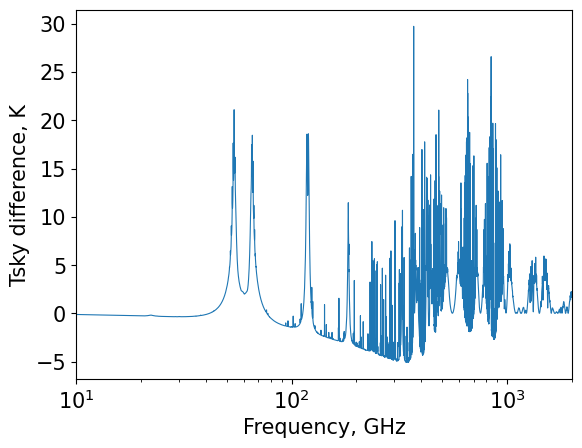

In [6]:
pl.figure()
pl.plot(freqs, tskyznon0-tskyz45, lw=0.8)
pl.xscale('log')
pl.xlim(10,2000)
pl.xlabel('Frequency, GHz')
pl.ylabel('Tsky difference, K')

tskyznon0_const_Tatm = tatmconst* (1-transmittance)
pl.figure()
pl.plot(freqs, tskyznon0_const_Tatm-tskyz45, lw=0.8)
pl.xscale('log')
pl.xlim(10,2000)
pl.xlabel('Frequency, GHz')
pl.ylabel('Tsky difference, K')

So the Tsky for elevation=45° generated via the equations from the ALMA memo is actually closer to that expected than if we used a constant T_atm. Are we, therefore, better off using our current method?

Note that the assumption of tau proportional to sec(z) seems to be broadly correct other than close to a few telluric lines, as shown below.

Text(0, 0.5, 'tau difference')

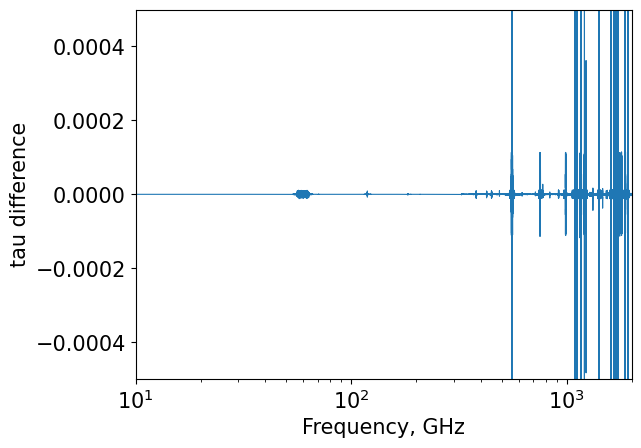

In [8]:
pl.figure()
pl.plot(freqs, tau-tau45, lw=0.8)
pl.xscale('log')
pl.xlim(10,2000)
pl.ylim(-5e-4,5e-4)
pl.xlabel('Frequency, GHz')
pl.ylabel('tau difference')